In [1]:
import pandas as pd
import numpy as np
ser1 = pd.Series(np.arange(4))
ser1

0    0
1    1
2    2
3    3
dtype: int32

In [2]:
ser1[1:3]

1    1
2    2
dtype: int32

In [7]:
index=["a","b","c","d"]
ser2 = pd.Series(np.arange(4)*10,index)
ser2

a     0
b    10
c    20
d    30
dtype: int32

In [11]:
ser2['b':'d']

b    10
c    20
d    30
dtype: int32

In [16]:
data = np.arange(16).reshape((4,4))
index = ['Ohio','Colorado','Utah','New York']
colums = ['one','two','three','four']
df1 = pd.DataFrame(data,index,colums)
df1

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [18]:
df1['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [19]:
df1.two

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [21]:
df1[['two','four']]

,two,four
Ohio,1,3
Colorado,5,7
Utah,9,11
New York,13,15


In [25]:
df1[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [29]:
df1[df1<5]=0
df1

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [30]:
df1.loc['Colorado',['two','three']]

two      5
three    6
Name: Colorado, dtype: int32

In [32]:
df1.iloc[1,[1,2]]

two      5
three    6
Name: Colorado, dtype: int32

In [36]:
df1.loc[['Colorado','Utah'],['two','three']]

,two,three
Colorado,5,6
Utah,9,10


In [37]:
df1.iloc[[1,2],[1,2]]

,two,three
Colorado,5,6
Utah,9,10


In [40]:
s1 = pd.Series([7.3,-2.5,3.4,1.5],index=['a','c','d','e'])
s2 = pd.Series([-2.1,3.6,-1.5,4,3.1],index=['a','c','e','f','g'])

In [41]:
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [47]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)),
                  columns = ['a','b','c','d'])
df2 = pd.DataFrame(np.arange(20).reshape((4,5)),
                  columns = ['a','b','c','d','e'])
df2.loc[1,'b'] = np.nan

In [48]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [50]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [54]:
frame = pd.DataFrame(np.random.randn(4,3),
                    columns = ["b","d","e"],
                    index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,1.448497,1.434770,0.992077
Ohio,0.199530,-0.407965,-1.458528
Texas,0.859561,-1.188828,-0.446407
Oregon,-0.970185,-0.939186,2.144086


In [55]:
np.abs(frame)

,b,d,e
Utah,1.448497,1.434770,0.992077
Ohio,0.199530,0.407965,1.458528
Texas,0.859561,1.188828,0.446407
Oregon,0.970185,0.939186,2.144086


In [56]:
f = lambda x: x.max()-x.min()
frame.apply(f)

b    2.418682
d    2.623598
e    3.602614
dtype: float64

In [57]:
frame.apply(lambda x: x.max()-x.min(), axis='columns')

Utah      0.456419
Ohio      1.658058
Texas     2.048389
Oregon    3.114271
dtype: float64

In [59]:
def f(x):
    data = [x.min(), x.max()]
    index = ['min','max']
    return pd.Series(data,index)

frame.apply(f)

,b,d,e
min,-0.970185,-1.188828,-1.458528
max,1.448497,1.434770,2.144086


In [60]:
format = lambda x: '%.2f' %x
frame.applymap(format)

,b,d,e
Utah,1.45,1.43,0.99
Ohio,0.20,-0.41,-1.46
Texas,0.86,-1.19,-0.45
Oregon,-0.97,-0.94,2.14


In [61]:
frame["e"].map(format)

Utah       0.99
Ohio      -1.46
Texas     -0.45
Oregon     2.14
Name: e, dtype: object

In [63]:
s3 = pd.Series([0,1,2,3], index=["d","a","b","c"])
s3.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [70]:
df3 = pd.DataFrame(np.arange(8).reshape(2,4),
                  index = ["three", "one"],
                  columns = ["d","a","b","c"])
df3.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [71]:
df3.sort_index(axis=0)

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [91]:
df3.sort_index(axis=1).sort_index(axis=0)

,a,b,c,d
one,5,6,7,4
three,1,2,3,0


In [95]:
df3.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [97]:
s4 = pd.Series([4,7,-3,2])
s4.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [100]:
s5 = pd.Series([7,-5,7,4,2,0,4])
s5.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [102]:
s5 = pd.Series([7,-5,7,4,2,0,4])
s5.rank(ascending=False,method="max")

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [105]:
s6 = pd.Series(range(5), index=['kim','kim','lee','lee','park'])
s6

kim     0
kim     1
lee     2
lee     3
park    4
dtype: int64

In [106]:
s6['kim']

kim    0
kim    1
dtype: int64

In [107]:
s6['park']

4

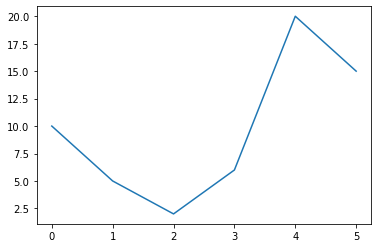

In [113]:
import matplotlib.pyplot as plt
data = [10,5,2,6,20,15]
plt.plot(data)
plt.show()

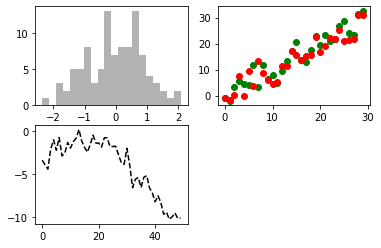

In [141]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.hist(np.random.randn(100),bins=20, color='k',alpha=0.3)
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30),
           color="g")
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30),
           color="r")
ax3 = fig.add_subplot(2,2,3)
ax3.plot(np.random.randn(50).cumsum(),'k--')
plt.show()

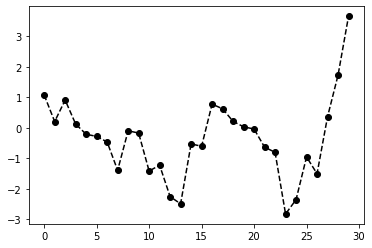

In [144]:
plt.plot(np.random.randn(30).cumsum(),'ko--')

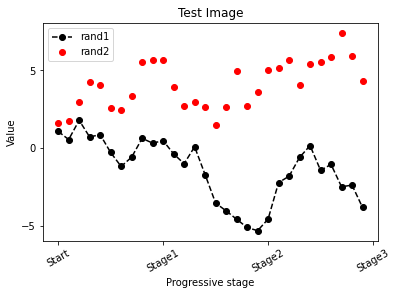

In [162]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(30).cumsum(), 'ko--' ,label="rand1")
ax.plot(np.random.randn(30).cumsum(), 'ro' ,label="rand2")
ax.legend(loc='best')
ax.set_xticks([0,10,20,30])
ax.set_xticklabels(["Start","Stage1","Stage2","Stage3"],rotation=30)
ax.set_xlabel("Progressive stage")
ax.set_yticks([-5,0,5])
ax.set_ylabel("Value")
ax.set_title("Test Image")
plt.show()

In [167]:
data1 = ([0.30283498, 1.52666225, 2.90945676, 3.86738636, 4.24788755,
       5.48721142, 6.74575031, 6.12889971, 6.33566785, 6.2623724 ,
       5.46463563, 5.95406034, 7.69868156, 6.57917899, 6.28150139,
       6.49389207, 5.45573916, 5.87779634, 5.1389048 , 6.76023641,
       8.46931594, 7.8492596 , 8.52964167, 8.32443771, 7.48946181,
       7.23897021, 6.27647801, 7.19951717, 6.67406396, 8.32855595])
data2 = ([ 1.05271717,  0.68321487, -0.10724953, -1.13881709, -1.85202023,
       -2.70595132, -1.9863995 , -2.4365586 , -2.04874896, -1.79008074,
       -1.78639245, -1.16006598, -1.02700714,  0.36719725,  1.15523216,
        1.07352716,  0.61122436,  0.05615597,  0.25615284,  0.78355948,
        0.09697884, -1.36003459, -1.2632886 , -0.47829648,  0.33197837,
        1.02253513,  1.58974326,  0.05682191,  0.8915611 , -0.39031741])

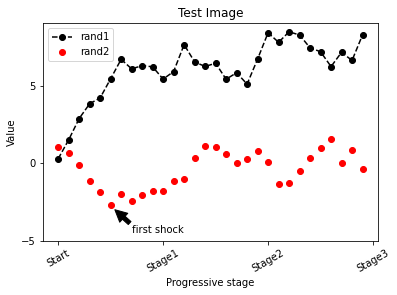

In [196]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(data1, 'ko--' ,label="rand1")
ax.plot(data2, 'ro' ,label="rand2")
ax.legend(loc='best')
ax.set_xticks([0,10,20,30])
ax.set_xticklabels(["Start","Stage1","Stage2","Stage3"],rotation=30)
ax.set_xlabel("Progressive stage")
ax.set_yticks([-5,0,5])
ax.set_ylabel("Value")
ax.set_title("Test Image")
#ax.text(3,-4,"first shock")
ax.annotate("first shock",xy=(5.4,-3),xytext=(7,-4.5),
            arrowprops=dict(facecolor="black"))
plt.show()

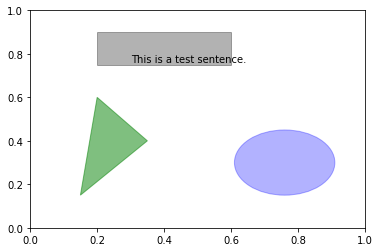

In [206]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2,0.75), 0.4,0.15, color='k',alpha=0.3)
ax.text(0.3,0.76,"This is a test sentence.")
ax.add_patch(rect)
cir = plt.Circle((0.76,0.3),0.15,color='b', alpha=0.3)
ax.add_patch(cir)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.5)
ax.add_patch(pgon)

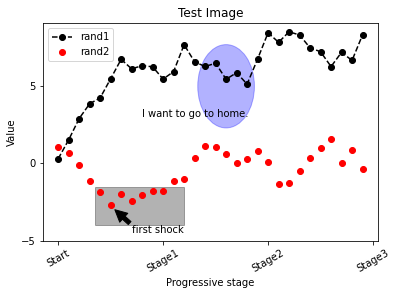

In [230]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(data1, 'ko--' ,label="rand1")
ax.plot(data2, 'ro' ,label="rand2")
ax.legend(loc='best')
ax.set_xticks([0,10,20,30])
ax.set_xticklabels(["Start","Stage1","Stage2","Stage3"],rotation=30)
ax.set_xlabel("Progressive stage")
ax.set_yticks([-5,0,5])
ax.set_ylabel("Value")
ax.set_title("Test Image")
#ax.text(3,-4,"first shock")
ax.annotate("first shock",xy=(5.4,-3),xytext=(7,-4.5),
            arrowprops=dict(facecolor="black"))
rect = plt.Rectangle((3.5,-4), 8.5,2.5, color='k',alpha=0.3)
ax.add_patch(rect)
cir = plt.Circle((16,5),2.7,color='b', alpha=0.3)
ax.add_patch(cir)
ax.text(8,3,"I want to go to home.")
plt.show()